In [2]:
import controller
import pandas as pd

GAME_TICK = 3600
WINDOW_HEIGHT = 800
WINDOW_WIDTH = 800
GRID_SIZE = (8, 8)
RUN_HEADLESS = True
NUM_TRIALS = 1000

grid_test_dict = {}
for GRID_SIZE in [(8,8), (9,9), (10,10), (12,12), (15,15), (20,20), (50,50)]:
    tester = controller.TrialRunner(NUM_TRIALS, GRID_SIZE, WINDOW_HEIGHT, WINDOW_WIDTH, GAME_TICK, RUN_HEADLESS)
    tester.run_trial()
    test_output = tester.output_table()
    test_output.to_csv(f'grid_size_data_{GRID_SIZE}_{NUM_TRIALS}.csv')
    grid_test_dict[GRID_SIZE] = test_output


grid_test_data = pd.concat(grid_test_dict.values(), ignore_index=True)
grid_test_data.to_csv('grid_size_data.csv')

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

In [4]:
grid_test_data = pd.read_csv('grid_size_data.csv')

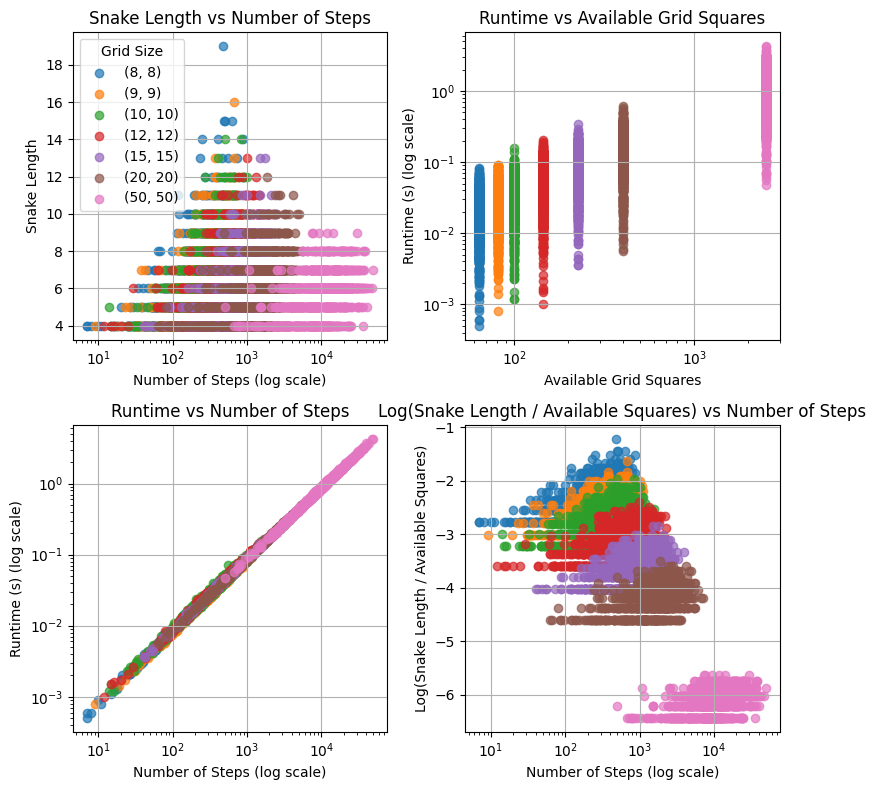

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the necessary columns
df = grid_test_data

# Check if grid_size needs conversion or not
first_element = df['grid_size'].iloc[0]
if isinstance(first_element, str):
    import ast
    df['grid_size'] = df['grid_size'].apply(ast.literal_eval)

# Calculate available grid squares (x * y)
df['available_grid_squares'] = df['grid_size'].apply(lambda x: x[0] * x[1])

# Convert 'grid_size' back to a categorical type for color coding
df['grid_size'] = pd.Categorical(df['grid_size'])
# Calculate available grid squares (x * y)
df['available_grid_squares'] = df['grid_size'].apply(lambda x: x[0] * x[1])

# Ensure 'snake_length' and 'available_grid_squares' are numeric
df['snake_length'] = df['snake_length'].astype(float)
df['available_grid_squares'] = df['available_grid_squares'].astype(float)

# Calculate snake length per square and take log
df['snake_length_per_square'] = np.log(df['snake_length'] / df['available_grid_squares'])

# Set up the figure
plt.figure(figsize=(8, 8))

# Plot 1: num_steps vs snake_length with logarithmic x-axis
plt.subplot(221)
for grid_size in df['grid_size'].unique():
    subset = df[df['grid_size'] == grid_size]
    plt.scatter(subset['num_steps'], subset['snake_length'], label=str(grid_size), alpha=0.7)
plt.xscale('log')
plt.xlabel('Number of Steps (log scale)')
plt.ylabel('Snake Length')
plt.title('Snake Length vs Number of Steps')
plt.grid(True)
plt.legend(title='Grid Size')

# Plot 2: available grid squares vs runtime (log-log)
plt.subplot(222)
for grid_size in df['grid_size'].unique():
    subset = df[df['grid_size'] == grid_size]
    plt.scatter(subset['available_grid_squares'], subset['runtime_milliseconds']/1000, label=str(grid_size), alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Available Grid Squares')
plt.ylabel('Runtime (s) (log scale)')
plt.title('Runtime vs Available Grid Squares')
plt.grid(True)

# Plot 3: num_steps vs runtime (log-log)
plt.subplot(223)
for grid_size in df['grid_size'].unique():
    subset = df[df['grid_size'] == grid_size]
    plt.scatter(subset['num_steps'], subset['runtime_milliseconds']/1000, label=str(grid_size), alpha=0.7)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of Steps (log scale)')
plt.ylabel('Runtime (s) (log scale)')
plt.title('Runtime vs Number of Steps')
plt.grid(True)

# Plot 4: num_steps vs snake_length/available grid squares (log-log)
plt.subplot(224)
for grid_size in df['grid_size'].unique():
    subset = df[df['grid_size'] == grid_size]
    plt.scatter(subset['num_steps'], subset['snake_length_per_square'], label=str(grid_size), alpha=0.7)
plt.xscale('log')
plt.xlabel('Number of Steps (log scale)')
plt.ylabel('Log(Snake Length / Available Squares)')
plt.title('Log(Snake Length / Available Squares) vs Number of Steps')
plt.grid(True)

plt.tight_layout()
plt.show()

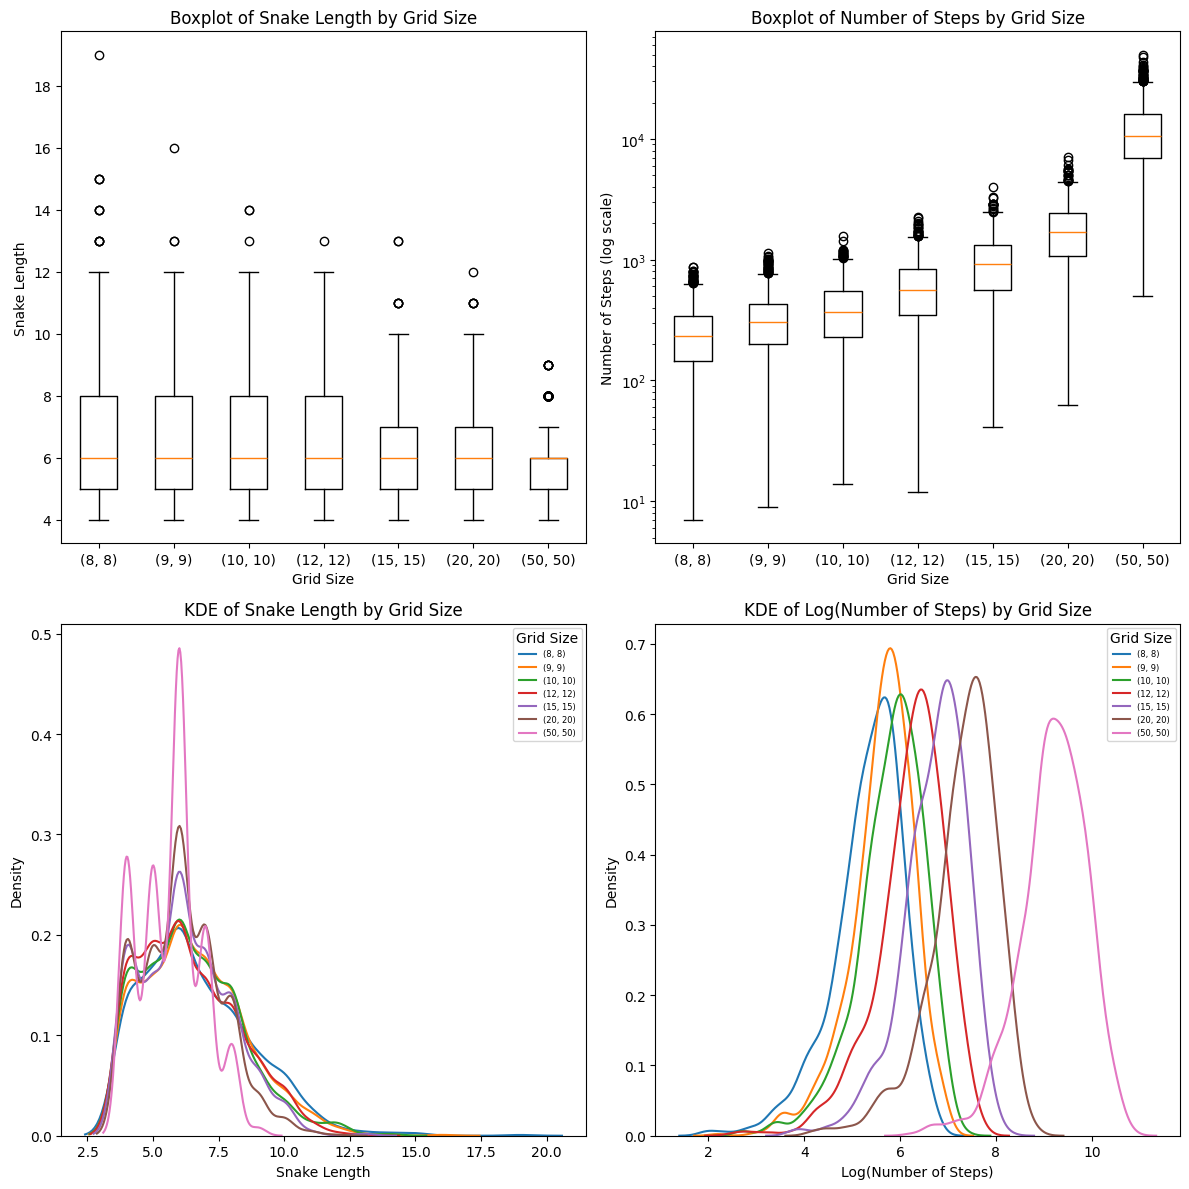

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the necessary columns
df = grid_test_data

# Convert 'grid_size' back to a categorical type for color coding
df['grid_size'] = pd.Categorical(df['grid_size'])

# Set up the figure for box plots and KDE/histogram plots
plt.figure(figsize=(12, 12))

# Boxplot for snake_length by grid_size
plt.subplot(221)
grouped_snake_length = df.groupby('grid_size', observed=True)['snake_length'].apply(list)
plt.boxplot(grouped_snake_length, labels=grouped_snake_length.index)
plt.title('Boxplot of Snake Length by Grid Size')
plt.xlabel('Grid Size')
plt.ylabel('Snake Length')

# Boxplot for num_steps by grid_size with log y-axis
plt.subplot(222)
grouped_num_steps = df.groupby('grid_size', observed=True)['num_steps'].apply(list)
plt.boxplot(grouped_num_steps, labels=grouped_num_steps.index)
plt.yscale('log')
plt.title('Boxplot of Number of Steps by Grid Size')
plt.xlabel('Grid Size')
plt.ylabel('Number of Steps (log scale)')

# KDE/Histogram for snake_length by grid size
plt.subplot(223)
for grid_size in df['grid_size'].unique():
    sns.kdeplot(df[df['grid_size'] == grid_size]['snake_length'], label=str(grid_size))
plt.title('KDE of Snake Length by Grid Size')
plt.xlabel('Snake Length')
plt.ylabel('Density')
plt.legend(title='Grid Size', prop={'size': 6})

# KDE/Histogram for num_steps by grid size
plt.subplot(224)
for grid_size in df['grid_size'].unique():
    sns.kdeplot(np.log(df[df['grid_size'] == grid_size]['num_steps']), label=str(grid_size))
plt.title('KDE of Log(Number of Steps) by Grid Size')
plt.xlabel('Log(Number of Steps)')
plt.ylabel('Density')
plt.legend(title='Grid Size', prop={'size': 6})

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


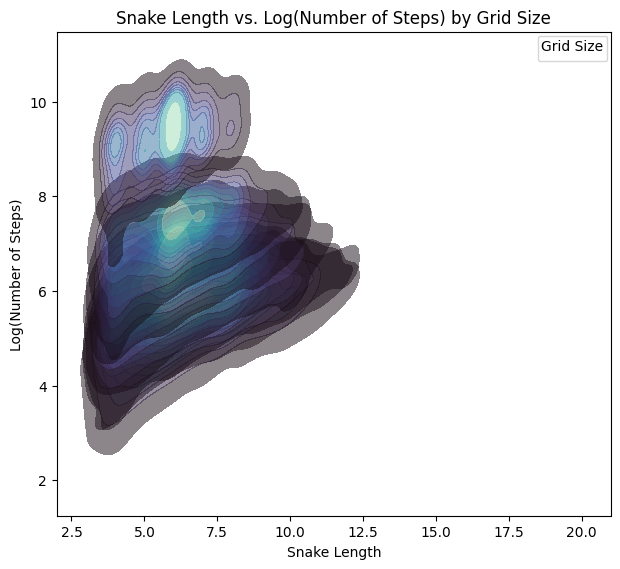

In [8]:
# Plot a Snake Length x Log(Number of Steps), using color for the density/KDE

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with the necessary columns
df = grid_test_data

# Convert 'grid_size' back to a categorical type for color coding
df['grid_size'] = pd.Categorical(df['grid_size'])

# Set up the figure for box plots, KDE/histogram plots, and the new scatter plot with KDE
plt.figure(figsize=(12, 16))  # Adjusted size to fit the new plot

# [Your existing plots here...]

# Scatter plot of Snake Length vs Log(Number of Steps) with KDE
plt.subplot(325)  # Adjust the subplot position
for grid_size in df['grid_size'].unique():
    subset = df[df['grid_size'] == grid_size]
    sns.kdeplot(x=subset['snake_length'], y=np.log(subset['num_steps']), label=str(grid_size), cmap="mako", fill=True, alpha=0.5)
plt.title('Snake Length vs. Log(Number of Steps) by Grid Size')
plt.xlabel('Snake Length')
plt.ylabel('Log(Number of Steps)')
plt.legend(title='Grid Size', prop={'size': 6})

plt.tight_layout()
plt.show()


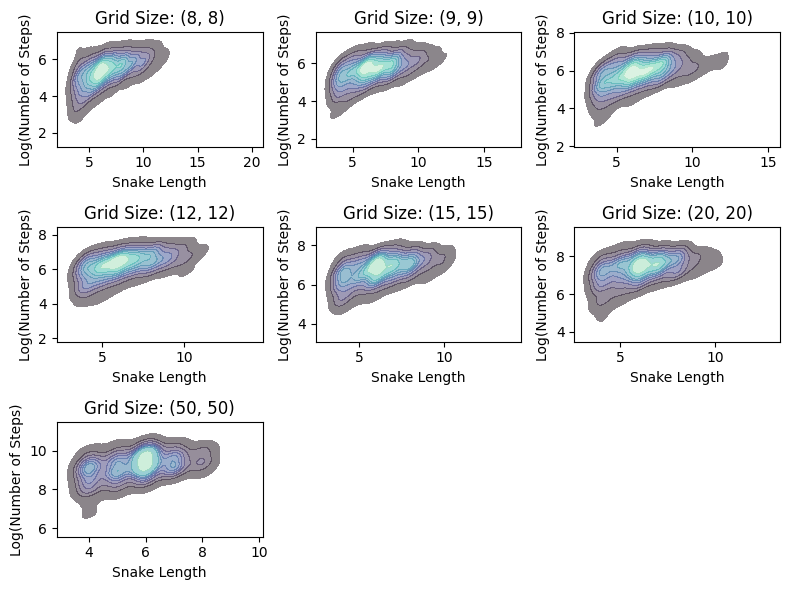

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df is your DataFrame with the necessary columns
df = grid_test_data

# Convert 'grid_size' back to a categorical type for color coding
df['grid_size'] = pd.Categorical(df['grid_size'])

# Set up the figure for the 3x3 grid of subplots
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

unique_grid_sizes = df['grid_size'].unique()
for i, grid_size in enumerate(unique_grid_sizes):
    plt.subplot(3, 3, i+1)  # Position each subplot in the 3x3 grid
    subset = df[df['grid_size'] == grid_size]
    sns.kdeplot(x=subset['snake_length'], y=np.log(subset['num_steps']), cmap="mako", fill=True, alpha=0.5)
    # plt.subplot_title('Log(Number of Steps) by Snake Length')
    plt.title(f'Grid Size: {grid_size}')
    plt.xlabel('Snake Length')
    plt.ylabel('Log(Number of Steps)')

plt.tight_layout()
plt.show()


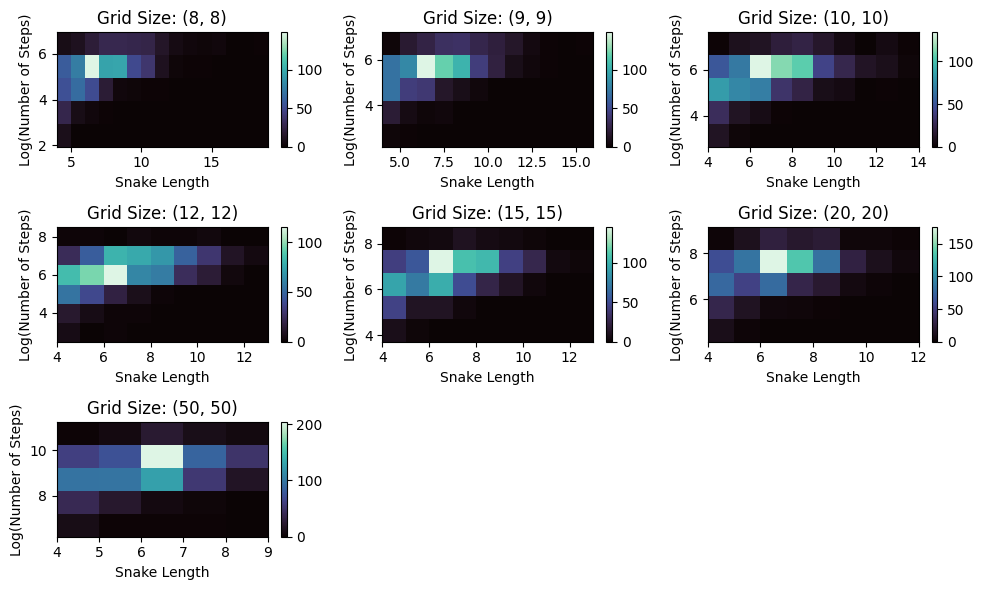

In [17]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i, grid_size in enumerate(unique_grid_sizes):
    plt.subplot(3, 3, i+1)
    subset = df[df['grid_size'] == grid_size]
    plt.hist2d(subset['snake_length'], np.log(subset['num_steps']), bins=[np.arange(subset['snake_length'].min(), subset['snake_length'].max() + 1), np.arange(np.log(subset['num_steps']).min(), np.log(subset['num_steps']).max() + 1)], cmap="mako")
    plt.colorbar()
    plt.title(f'Grid Size: {grid_size}')
    plt.xlabel('Snake Length')
    plt.ylabel('Log(Number of Steps)')

plt.tight_layout()
plt.show()
